In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

batting_csv_path = "team.csv"

complete_df =  pd.read_csv(batting_csv_path)
#complete_df

In [2]:
dh_df = pd.DataFrame(complete_df[['year', 'league_id', 'franchise_id','rank', 'g','ghome', 'w', 'l','r', 'ab',
                                'h', 'double', 'triple', 'hr', 'bb', 'so','ra', 'er', 'era',
                                'sho','ha', 'hra', 'bba','soa', 'e', 'dp', 'fp','attendance','bpf', 'ppf']])


In [3]:
rename_df = dh_df.rename(columns={'year':"Year", 'league_id':"League",'franchise_id':"Franchise", 'rank':"Rank",
                                 'g':"Games", 'w':"Wins", 'l':"Loses",'r':"Runs",'ab':"At_Bats", 'h': "Hits", 
                                 "double":"Doubles", 'triple':"Triples", 'hr':"HR", 'bb':"BB", 'so':"SO", 'ra':"RA",
                                 'er':"ER", 'era':"ERA", 'sho':"SHO", 'ha':"HA", 'hra':"HRA", 'bba':"BBA", 'soa':"SOA",
                                 'e':"Errors", 'dp':"DP",'fp':"FP", 'attendance':"Attendance", 'bpf':"DPF", 'ppf':"PPF"})

rename_df.columns

rename_df["Year"].dtypes

dtype('int64')

In [4]:
Modern_df = rename_df.loc[(rename_df["Year"] > 1950)]

NL_df = Modern_df.loc[(rename_df["League"]== "NL")]

AL_df = Modern_df.loc[(rename_df["League"]== "AL")]
AL_df.reset_index()

AL_df.index = AL_df["Year"]
NL_df.index = NL_df["Year"]

AL_df.index.name = None
NL_df.index.name = None

Modern_df.head()

,Year,League,Franchise,Rank,Games,ghome,Wins,Loses,Runs,At_Bats,...,HA,HRA,BBA,SOA,Errors,DP,FP,Attendance,DPF,PPF
1199,1951,AL,BOS,3,154,75.0,87,67,804,5378,...,1413,100,599,658,138,184.0,0.97,1312282.0,110,109
1200,1951,NL,LAD,2,158,78.0,97,60,855,5492,...,1360,150,549,693,128,192.0,0.97,1282628.0,102,99
1201,1951,NL,ATL,4,155,78.0,76,78,723,5293,...,1378,96,595,604,145,157.0,0.97,487475.0,93,93
1202,1951,AL,CHW,4,155,78.0,81,73,714,5378,...,1353,109,549,572,151,176.0,0.97,1328234.0,98,98
1203,1951,NL,CHC,8,155,77.0,62,92,614,5307,...,1416,125,572,544,181,161.0,0.97,894415.0,102,104


In [5]:
# Has the Addition of the DH changed the ERA in either league
AL_ERA = pd.DataFrame(AL_df[["Year","ERA", "Games", "League",]])
NL_ERA = pd.DataFrame(NL_df[["Year","ERA", "Games", "League"]])

AL_ERA.head()

,Year,ERA,Games,League
1951,1951,4.14,154,AL
1951,1951,3.50,155,AL
1951,1951,3.38,155,AL
1951,1951,4.29,154,AL
1951,1951,3.56,154,AL


In [6]:
grouped_ERA_AL = AL_ERA.groupby("Year")
grouped_ERA_NL = NL_ERA.groupby("Year")

AL_Sums = grouped_ERA_AL["ERA"].sum() 
NL_Sums = grouped_ERA_NL["ERA"].sum()

AL_ERA_difference = pd.DataFrame(grouped_ERA_AL["ERA"].sum()/grouped_ERA_AL["Games"].sum())
NL_ERA_difference = pd.DataFrame(grouped_ERA_NL["ERA"].sum()/grouped_ERA_NL["Games"].sum())

Difference = pd.DataFrame(AL_ERA_difference-NL_ERA_difference)

Diff5 = Difference.rename(columns={0: "ERA_Difference"})

Diff_reset = Difference.reset_index()



In [7]:
x_axis7 = Diff_reset["Year"]

vc_slope3, vc_int3, vc_r3, vc_p3, vc_std_err3 = stats.linregress(
   x_axis7, AL_ERA_difference[0])
vc_fit3 = vc_slope3 * x_axis7 + vc_int3
plt.show()

In [8]:
x_axis = Diff_reset["Year"]
y_axis = Diff5["ERA_Difference"]

vc_slope2, vc_int2, vc_r2, vc_p2, vc_std_err2 = stats.linregress(
    x_axis, y_axis)
vc_fit2 = vc_slope2 * x_axis + vc_int2

<IPython.core.display.Javascript object>


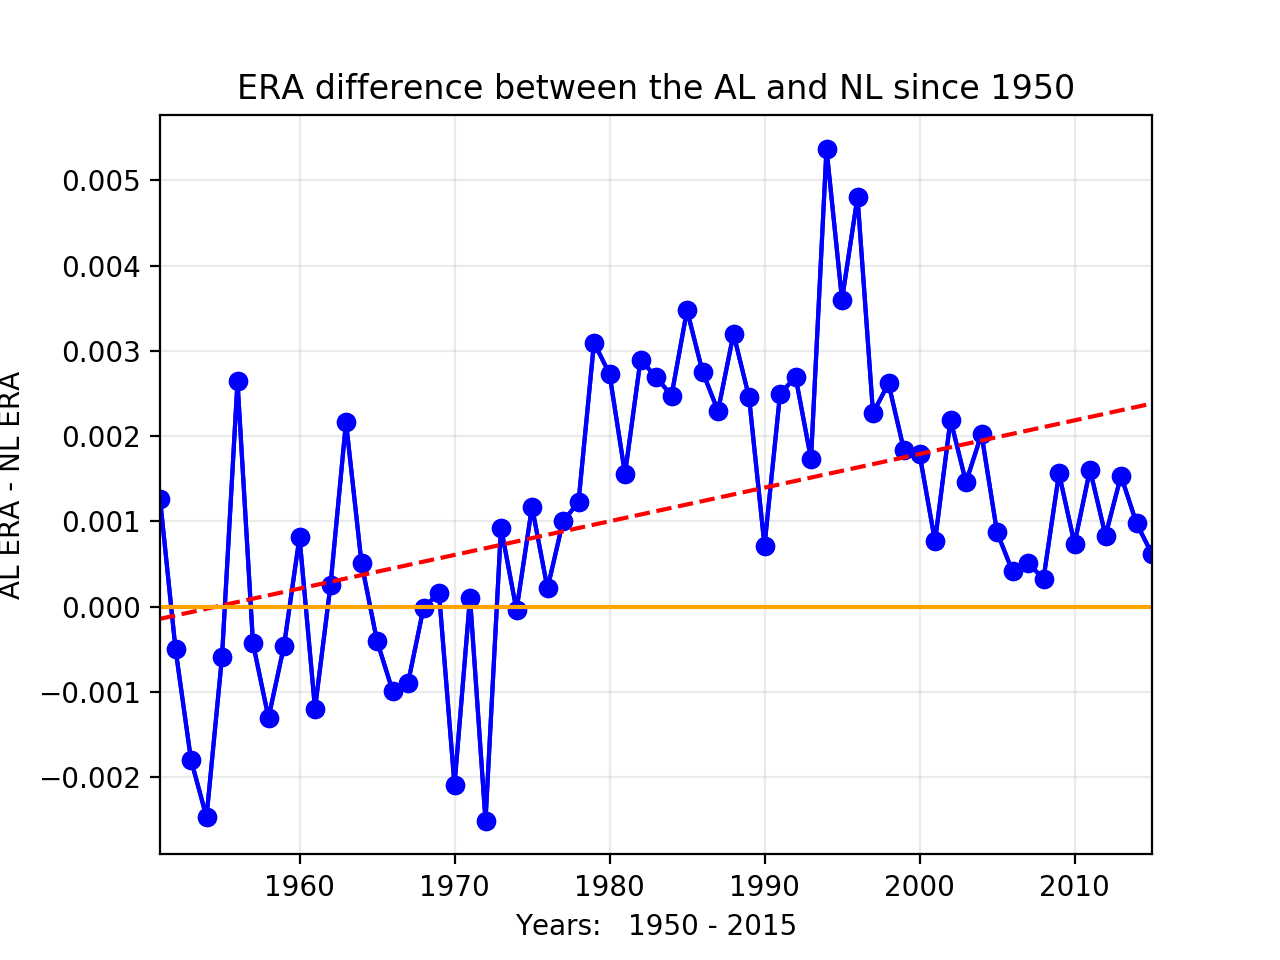

Since the Adoption of the DH, the AL pitchers have a slightly higher ERA


In [9]:
Diff5["ERA_Difference"].plot(kind= "line", color= "b", marker="o")
plt.plot(x_axis, y_axis, color="b",  marker="o")

plt.plot(x_axis, vc_fit2, "b--", color= "r")
plt.plot(x_axis, [0 for _ in range(len(x_axis))], color = "orange")

plt.title("ERA difference between the AL and NL since 1950")
plt.xlabel("Years:   1950 - 2015")
plt.ylabel("AL ERA - NL ERA")
plt.grid(alpha= .25)

plt.show()

Average_Run_Dif = Diff5["ERA_Difference"].mean()
ARD = round(Average_Run_Dif,3)

print(f"Since the Adoption of the DH, the AL pitchers have a slightly higher ERA")
